In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU

from plotnine import *

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [227]:
url = 'https://raw.githubusercontent.com/min-is/nba/refs/heads/main/datasets/jaysontatum.csv'
df = pd.read_csv(url)
df = pd.get_dummies(df, columns = ["Opp"])

df = df.fillna(0)  # Replace NaNs
df = df.replace([np.inf, -np.inf], 0)

features = [col for col in df.columns if col != "PTS"]

df.head()
print(features)

['Ven', 'WinMar', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'GmSc', '+/-', 'TS%', 'eFG%', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'ORtg', 'DRtg', 'BPM', 'Opp_ATL', 'Opp_BRK', 'Opp_CHI', 'Opp_CHO', 'Opp_CLE', 'Opp_DAL', 'Opp_DEN', 'Opp_DET', 'Opp_GSW', 'Opp_HOU', 'Opp_IND', 'Opp_LAC', 'Opp_LAL', 'Opp_MEM', 'Opp_MIA', 'Opp_MIL', 'Opp_MIN', 'Opp_NOP', 'Opp_NYK', 'Opp_OKC', 'Opp_ORL', 'Opp_PHI', 'Opp_PHO', 'Opp_POR', 'Opp_SAC', 'Opp_SAS', 'Opp_TOR', 'Opp_UTA', 'Opp_WAS']


In [ ]:

X = df[features]
y = df["PTS"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

z = StandardScaler()
X_train_scaled = z.fit_transform(X_train)
X_test_scaled = z.transform(X_test)

# alpha NN model
model = Sequential([
    Dense(2048, input_shape=(X_train_scaled.shape[1],)),
    LeakyReLU(alpha=0.01),
    Dense(1024),
    Dropout(0.3),
    Dense(512),
    LeakyReLU(alpha=0.01),
    Dense(512),
    LeakyReLU(alpha=0.01),
    Dense(256),
    LeakyReLU(alpha=0.01),
    Dense(256),
    LeakyReLU(alpha=0.01),
    Dense(128),
    Dropout(0.2),
    Dense(64),
    LeakyReLU(alpha=0.01),
    Dense(32),
    LeakyReLU(alpha=0.01),
    Dense(16),
    LeakyReLU(alpha=0.01),
    Dense(8),
    LeakyReLU(alpha=0.01),
    Dense(1)
])

model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_208 (Dense)           (None, 2048)              135168    
                                                                 
 leaky_re_lu_63 (LeakyReLU)  (None, 2048)              0         
                                                                 
 dense_209 (Dense)           (None, 1024)              2098176   
                                                                 
 dropout_24 (Dropout)        (None, 1024)              0         
                                                                 
 dense_210 (Dense)           (None, 512)               524800    
                                                                 
 leaky_re_lu_64 (LeakyReLU)  (None, 512)               0         
                                                                 
 dense_211 (Dense)           (None, 512)             

In [ ]:
optimizer = Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer, loss='mse', metrics=["mae"])
history = model.fit(
    X_train_scaled, y_train,
    epochs=1000, batch_size=32,
    validation_data=(X_test_scaled, y_test),
    verbose=1
)

Epoch 1/1000
7/7 [==============================] - 1s 37ms/step - loss: 834.3006 - mae: 27.6690 - val_loss: 831.9806 - val_mae: 27.9394
Epoch 2/1000
7/7 [==============================] - 0s 23ms/step - loss: 831.7360 - mae: 27.6235 - val_loss: 828.6523 - val_mae: 27.8810
Epoch 3/1000
7/7 [==============================] - 0s 22ms/step - loss: 828.6924 - mae: 27.5690 - val_loss: 824.6533 - val_mae: 27.8103
Epoch 4/1000
7/7 [==============================] - 0s 21ms/step - loss: 824.8732 - mae: 27.5000 - val_loss: 819.7865 - val_mae: 27.7233
Epoch 5/1000
7/7 [==============================] - 0s 22ms/step - loss: 819.9448 - mae: 27.4117 - val_loss: 813.8239 - val_mae: 27.6162
Epoch 6/1000
7/7 [==============================] - 0s 21ms/step - loss: 814.1135 - mae: 27.3089 - val_loss: 806.5688 - val_mae: 27.4856
Epoch 7/1000
7/7 [==============================] - 0s 22ms/step - loss: 805.5625 - mae: 27.1519 - val_loss: 797.4405 - val_mae: 27.3209
Epoch 8/1000
7/7 [=======================

In [ ]:
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

2/2 [==============================] - 0s 3ms/step
Mean Absolute Error (MAE): 2.4066624728116124
Mean Squared Error (MSE): 9.317077187836384
Root Mean Squared Error (RMSE): 3.0523887674797234
R-squared (R²): 0.819116648740132


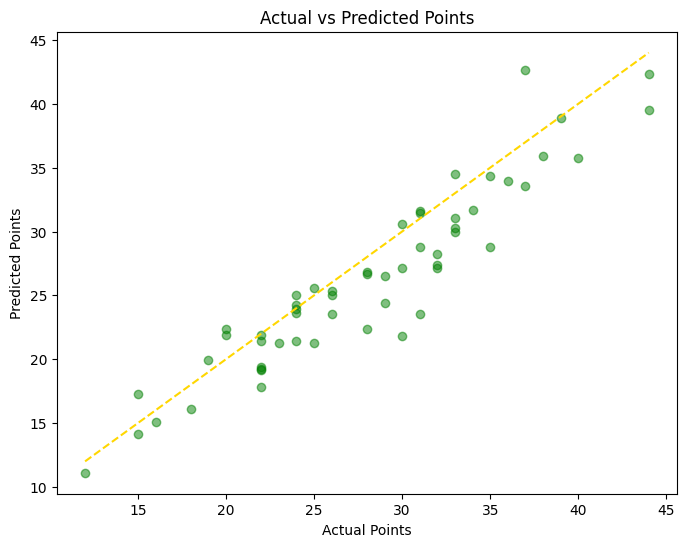

In [256]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gold', linestyle='--')
plt.xlabel("Actual Points")
plt.ylabel("Predicted Points")
plt.title("Actual vs Predicted Points")
plt.show()

In [ ]:
def get_average_stats_against_opponent(df, opponent):
    opponent_column = f"Opp_{opponent}"
    if opponent_column not in df.columns:
        raise ValueError(f"Opponent column {opponent_column} does not exist in the dataset.")
    
    opponent_data = df[df[opponent_column] == 1] 
    average_stats = opponent_data[features].mean() 
    return average_stats

opponent = "MIN"
average_stats = get_average_stats_against_opponent(df, opponent)

game_type = input("Is this a home or away game? ").strip().lower()
if game_type == 'home':
    average_stats['Ven'] = 0
elif game_type == 'away':
    average_stats['Ven'] = 1
else:
    print("Invalid input. Please enter either 'home' or 'away'.")

print(average_stats)


Ven          0.000000
WinMar       6.285714
GS           1.000000
MP          38.007143
FG          10.285714
FGA         22.142857
FG%          0.454714
3P           3.571429
3PA         10.428571
3P%          0.312429
FT           7.571429
FTA          8.857143
FT%          0.815000
ORB          0.428571
DRB          6.714286
TRB          7.142857
AST          4.285714
STL          2.142857
BLK          0.285714
TOV          2.571429
PF           2.857143
GmSc        23.757143
+/-          8.428571
TS%          0.605429
eFG%         0.530857
ORB%         1.128571
DRB%        21.471429
TRB%        10.785714
AST%        19.685714
STL%         2.800000
BLK%         0.771429
TOV%         8.914286
USG%        33.685714
ORtg       119.428571
DRtg       111.000000
BPM          7.328571
Opp_ATL      0.000000
Opp_BRK      0.000000
Opp_CHI      0.000000
Opp_CHO      0.000000
Opp_CLE      0.000000
Opp_DAL      0.000000
Opp_DEN      0.000000
Opp_DET      0.000000
Opp_GSW      0.000000
Opp_HOU   

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

input_data = average_stats.values.reshape(1, -1) 
input_data_scaled = scaler.transform(input_data)
predicted_points = model.predict(input_data_scaled)

print(f"Predicted points for Jayson Tatum against {opponent}: {predicted_points[0]}")

1/1 [==============================] - 0s 16ms/step
Predicted points for Jayson Tatum against MIN: [26.257288]
